In [1]:
import sys
sys.path = ['/Users/rejsmont/PycharmProjects/rdn-wdp-python/analysis'] + sys.path

In [2]:
from CellModels.Clustering.IO import ClusteringReader

basedir = '/Users/rejsmont/Google Drive/My Drive/Projects/RDN-WDP'
ato_p = ClusteringReader.read(basedir + '/processing/clustering/bigc100k6n20r1000_metadata.yml')

In [3]:
cells = ato_p.cells
cells

Position                      Measurements            \
                    Normalized                        Normalized             
                             x          y         z      mCherry     Venus   
Gene Sample Nucleus                                                          
Abl  1Q8GA8 1239543   1.454965  15.329020  0.751815     0.171228  0.830571   
            1239544   1.979088  15.838467  0.740619     0.187337  0.613269   
            1239545   6.102696  19.271921  0.854784     0.195026  0.498462   
            1239546  10.614307  22.123290  0.778087     0.162865  0.292009   
            1239547   0.639369  12.605514  0.797042     0.245897  0.775441   
...                        ...        ...       ...          ...       ...   
spdo U0R0WS 1989145  13.636071  -0.953809  4.117531     0.239002  0.299819   
            1989146  17.377004   0.434604  4.159967     0.320409  0.350425   
            1989147  15.133310   3.362016  4.137667     0.206911  0.285008   
            1989148  13.815633  -3.539903  4.202985     0.192044  0.313957   
            1989149  11.240356  -2.595631  4.162754     0.202423  0.247699   

                                                                        \
                                  Raw Prominence                 Angle   
                          DAPI Volume    mCherry     Venus     mCherry   
Gene Sample Nucleus                                                      
Abl  1Q8GA8 1239543  13.854070   5020   0.837475  0.910950   72.597306   
            1239544  14.397083   4522   1.006505  0.591404   44.716713   
            1239545  21.186515  12339   1.047569  0.808834  173.828641   
            1239546  18.692125   8100   0.861932  0.327443  129.476525   
            1239547  19.484099   4806   1.123186  0.985807   37.003297   
...                        ...    ...        ...       ...         ...   
spdo U0R0WS 1989145  19.406605   8595   0.570954  1.257708    7.767949   
            1989146  18.459796   7089   0.479263  1.425268   20.500289   
            1989147  19.834397   7318   0.416987  1.138248  162.220803   
            1989148  18.634784   4006   0.580034  1.377011   64.370008   
            1989149  23.191932   3773   0.573739  1.093847   29.855944   

                                Cluster  
                                   ward  
                          Venus       6  
Gene Sample Nucleus                      
Abl  1Q8GA8 1239543   88.679193     4.0  
            1239544   59.522732     4.0  
            1239545  109.918618     4.0  
            1239546   51.013798     4.0  
            1239547   88.526588     4.0  
...                         ...     ...  
spdo U0R0WS 1989145   14.861582     5.0  
            1989146  152.308561     3.0  
            1989147  163.978249     3.0  
            1989148   12.571874     5.0  
            1989149    4.547415     5.0  

[2368709 rows x 12 columns]

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = ato_p.cells[ato_p.config.rf_features]
z = StandardScaler().fit_transform(x)
pca = PCA().fit_transform(z)
pca = pd.DataFrame(pca, index=x.index, columns=['PC' + str(x+1) for x in range(pca.shape[1])])
pca.to_hdf('imaging_embeddings.h5', 'pca')
pca

PC1       PC2       PC3       PC4       PC5  \
Gene Sample Nucleus                                                     
Abl  1Q8GA8 1239543 -0.183864  0.144961  0.078523  2.269376 -1.924591   
            1239544  0.197161  0.409544  0.491188  2.363546 -1.903158   
            1239545  0.382762 -0.533703 -2.833227  0.728744 -0.944888   
            1239546 -0.021126 -0.694798 -1.183818  1.373385 -1.662154   
            1239547  0.453774  0.743057  0.510349  2.361372 -1.680705   
...                       ...       ...       ...       ...       ...   
spdo U0R0WS 1989145 -2.033900  1.528590  0.418937  0.880610  0.563876   
            1989146 -2.133361  1.085707  0.834628  1.068540  0.428795   
            1989147 -2.206478 -0.681804 -0.462389  1.323908  0.558003   
            1989148 -2.019487  0.536661  1.404433  1.967564  0.356711   
            1989149 -2.042640  0.892545  1.681765  2.059940  0.240200   

                          PC6       PC7  
Gene Sample Nucleus                      
Abl  1Q8GA8 1239543  0.206206  0.243315  
            1239544  0.507122 -0.178772  
            1239545 -0.212966 -0.405578  
            1239546  0.116983  0.096299  
            1239547  0.437791 -0.420270  
...                       ...       ...  
spdo U0R0WS 1989145  0.611918  0.544006  
            1989146  0.414160  0.894306  
            1989147 -1.090814  1.054425  
            1989148 -0.608290  0.652672  
            1989149 -0.137977  0.659937  

[2368709 rows x 7 columns]

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_jobs=-1, n_components=3).fit_transform(pca)
tsne = pd.DataFrame(tsne, index=x.index, columns=['TSNE' + str(x+1) for x in range(tsne.shape[1])])
tsne.to_hdf('imaging_embeddings.h5', 'tsne')
tsne

TSNE1         TSNE2         TSNE3
Gene Sample Nucleus                                      
Abl  1Q8GA8 1239543 -0.000007  4.891875e-06  5.333171e-06
            1239544 -0.000003  5.127322e-06  2.126512e-05
            1239545  0.000012 -1.029092e-05 -6.980173e-06
            1239546  0.000010  5.676662e-08 -6.140564e-07
            1239547 -0.000017  1.887430e-06  1.995908e-05
...                       ...           ...           ...
spdo U0R0WS 1989145  0.000007  4.299663e-06 -6.365350e-06
            1989146  0.000010 -3.531562e-06  9.703850e-07
            1989147 -0.000007  1.065267e-05 -1.374790e-05
            1989148 -0.000014 -9.153158e-06  1.694698e-05
            1989149 -0.000028 -2.153410e-05  3.521267e-06

[2368709 rows x 3 columns]

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [7]:
from umap import UMAP

umap = UMAP(n_components=3).fit_transform(pca)
umap = pd.DataFrame(umap, index=x.index, columns=['UMAP' + str(x+1) for x in range(umap.shape[1])])
umap.to_hdf('imaging_embeddings.h5', 'umap')
umap

UMAP1     UMAP2     UMAP3
Gene Sample Nucleus                              
Abl  1Q8GA8 1239543  7.156202  3.750311  0.943751
            1239544  6.821703  4.646731  1.524172
            1239545  8.882692  2.069001  0.895447
            1239546  8.088944  1.613821 -0.069247
            1239547  6.709524  5.125337  1.807665
...                       ...       ...       ...
spdo U0R0WS 1989145  5.251669  3.520264  6.646681
            1989146  4.724873  3.138059  6.397416
            1989147  4.613216  2.850898  7.052466
            1989148  4.621615  3.137244  6.538447
            1989149  4.602902  3.160645  6.448132

[2368709 rows x 3 columns]

/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PCA')

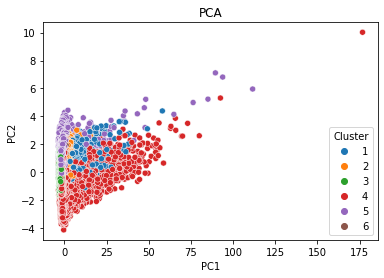

In [8]:
import seaborn as sns
pca_c = pca.join(cells[[('Cluster', 'ward', 6)]]).rename(columns={('Cluster', 'ward', 6): 'Cluster'})
pca_c['Cluster'] = pca_c['Cluster'].astype(int).astype('category')
sns.scatterplot(data=pca_c, x='PC1', y='PC2', hue='Cluster').set_title('PCA')

/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'TSNE')

/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


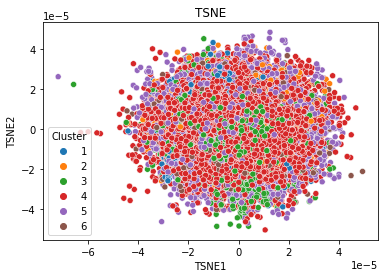

In [9]:
tsne_c = tsne.join(cells[[('Cluster', 'ward', 6)]]).rename(columns={('Cluster', 'ward', 6): 'Cluster'})
tsne_c['Cluster'] = tsne_c['Cluster'].astype(int).astype('category')
sns.scatterplot(data=tsne_c, x='TSNE1', y='TSNE2', hue='Cluster').set_title('TSNE')

/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'UMAP')

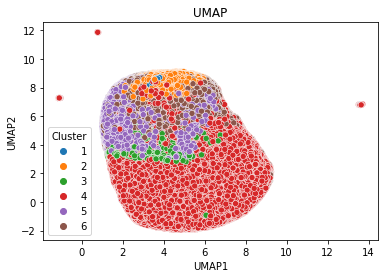

In [10]:
umap_c = umap.join(cells[[('Cluster', 'ward', 6)]]).rename(columns={('Cluster', 'ward', 6): 'Cluster'})
umap_c['Cluster'] = umap_c['Cluster'].astype(int).astype('category')
sns.scatterplot(data=umap_c, x='UMAP1', y='UMAP2', hue='Cluster').set_title('UMAP')

/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'UMAP')

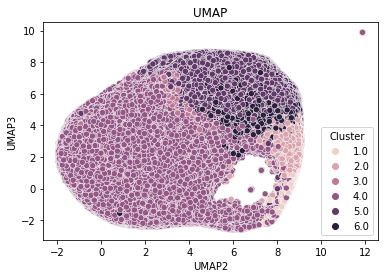

In [11]:
umap_c = umap.join(cells[[('Cluster', 'ward', 6)]]).rename(columns={('Cluster', 'ward', 6): 'Cluster'})
umap_c['Cluster'] = umap_c['Cluster']
sns.scatterplot(data=umap_c, x='UMAP2', y='UMAP3', hue='Cluster').set_title('UMAP')

/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'UMAP')

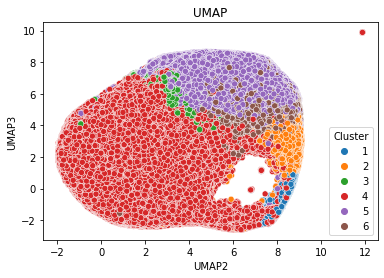

In [12]:
umap_c = umap.join(cells[[('Cluster', 'ward', 6)]]).rename(columns={('Cluster', 'ward', 6): 'Cluster'})
umap_c['Cluster'] = umap_c['Cluster'].astype(int).astype('category')
sns.scatterplot(data=umap_c, x='UMAP2', y='UMAP3', hue='Cluster').set_title('UMAP')

In [13]:
import scanpy as sc

adata = sc.read('imaging_leiden.h5ad')
adata

AnnData object with n_obs × n_vars = 2368709 × 7
    obs: 'Gene', 'Sample', 'Nucleus', 'leiden_0.0', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0'
    var: 'Type', 'Transform', 'Variable'
    uns: 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [14]:
leiden = adata.obs.copy()
leiden = leiden.set_index(['Gene', 'Sample', 'Nucleus'])
cols = pd.MultiIndex.from_product([['Cluster'], ['leiden'], leiden.columns.str.replace('leiden_', '')])
leiden.columns = cols
clustering = leiden.join(cells[('Cluster', 'ward', 6)].astype(int).astype('category'))
clustering

Cluster                                             
                     leiden                                         ward
                        0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0    6
Gene Sample Nucleus                                                     
Abl  1Q8GA8 1239543       0   0   4   6   8   5   1  13  10   7   2    4
            1239544       0   0   4   6   8   5   1  13  11   7   2    4
            1239545       0   0   4   1   7   2   0   0   3   1  16    4
            1239546       0   0   4   6   2   5  10  12  10  12  16    4
            1239547       0   0   4   6   8   5   1  13  11   7   2    4
...                     ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...
spdo U0R0WS 1989145       0   1   2   5   3  16   7   4   0  13  20    5
            1989146       0   1   2   5   3  16   7   4  24  13   1    3
            1989147       0   0   3   5   3   0   4   5  22  10  22    3
            1989148       0   1   2   5   3  16   7   4   7  13  22    5
            1989149       0   1   2   5   3  14   7   4   0  13   1    5

[2368709 rows x 12 columns]

In [15]:
umap_cls = clustering.join(umap)

/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (3 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


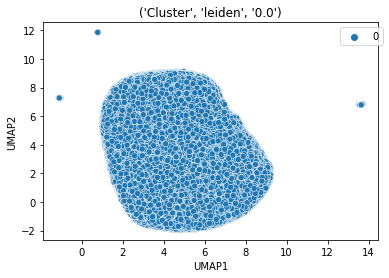

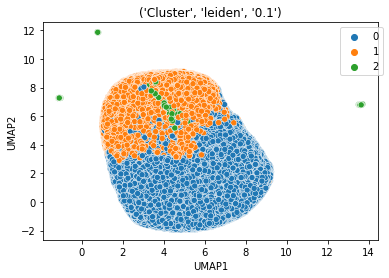

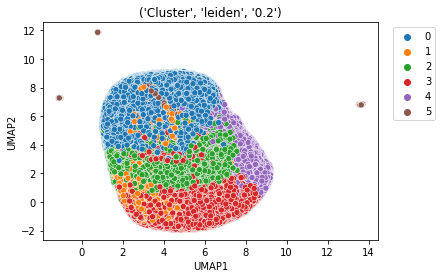

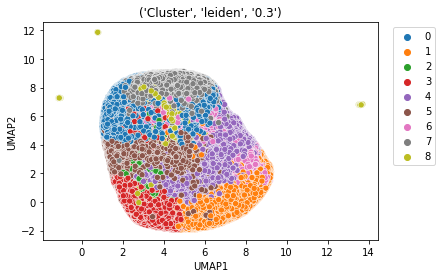

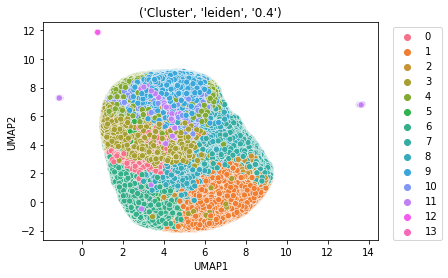

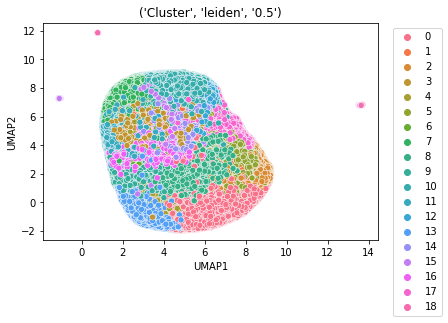

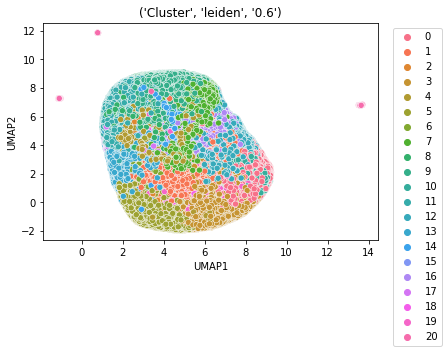

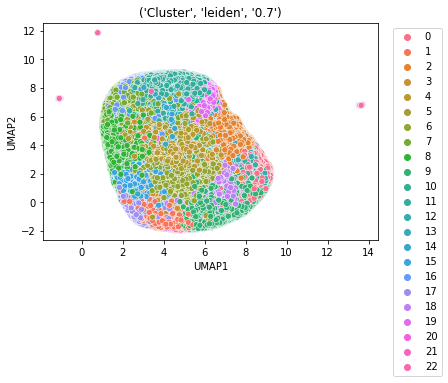

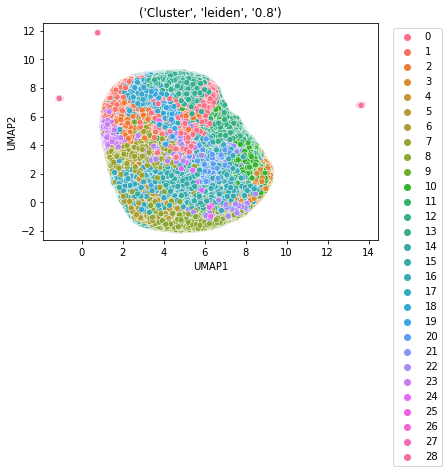

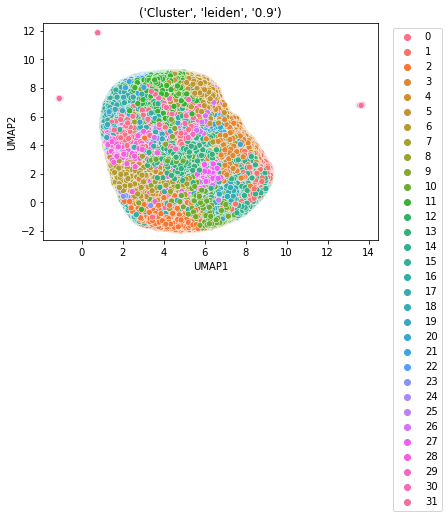

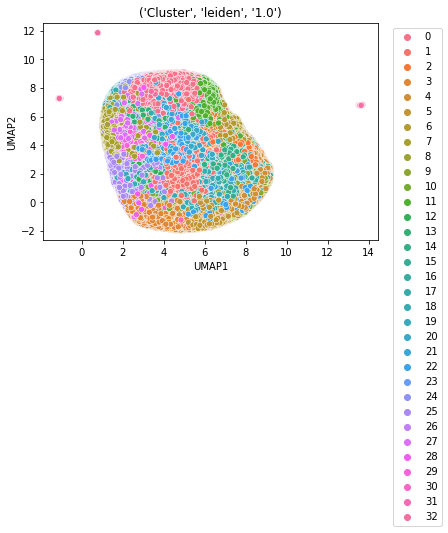

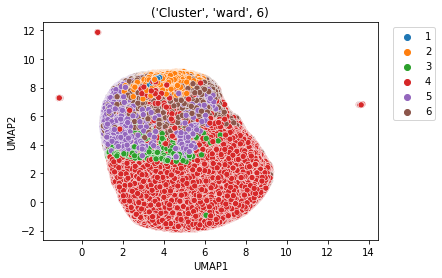

In [17]:
import matplotlib.pyplot as plt

for clustering in umap_cls.columns[:12]:
    fig, ax = plt.subplots()
    sns.scatterplot(data=umap_cls, x='UMAP1', y='UMAP2', hue=clustering, ax=ax)
    ax.set_title(str(clustering))
    ax.legend(bbox_to_anchor=(1.03, 1))